In [1]:
from zipfile import ZipFile

with ZipFile('archive (1).zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [1]:
import os
import numpy as np  
import datetime
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [6]:
# -- Global Variables -- 
TRAIN_PATH = 'F:/alk or run/walk_or_run_train/train'
TEST_PATH = 'F:/alk or run/walk_or_run_test/test'
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 10
CLASSES = ['Run','Walk']

In [ ]:
model = tf.keras.models.load_model('walker.h5')

In [7]:
# -- Data Normalization --
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                      rotation_range = 30,  
                                      zoom_range = 0.2, 
                                      width_shift_range=0.1,  
                                      height_shift_range=0.1,
                                      validation_split = 0.15)

In [8]:
# -- Data iterators -- 
train_data = data_generator.flow_from_directory(directory=TRAIN_PATH, 
                                                    target_size=TARGET_SIZE, 
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='categorical', 
                                                    
                                                    subset='training')         
    
validation_data = data_generator.flow_from_directory(directory=TRAIN_PATH, 
                                                    target_size=TARGET_SIZE, 
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='categorical', 
                                                     
                                                    subset='validation')             

test_data = data_generator.flow_from_directory(directory=TEST_PATH, 
                                                   target_size=TARGET_SIZE, 
                                                   batch_size=BATCH_SIZE, 
                                                   class_mode='categorical', 
                                                   )

Found 511 images belonging to 2 classes.
Found 89 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


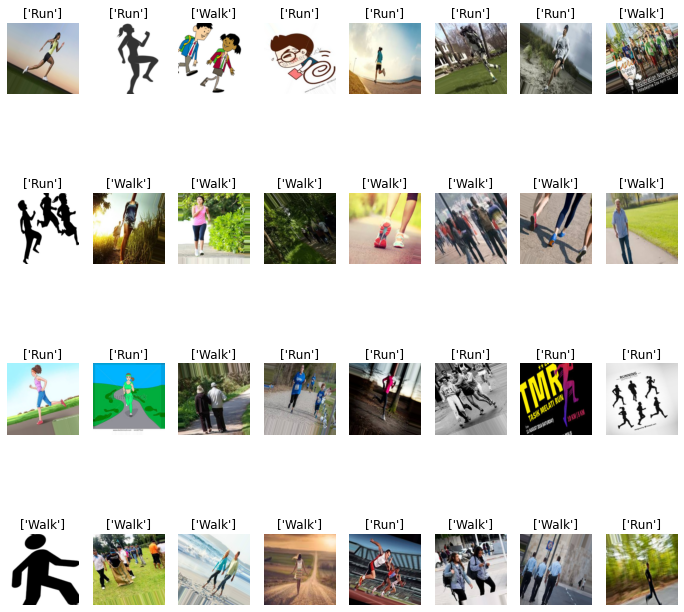

In [9]:
images ,labels = train_data.next()
classes  = np.asarray(CLASSES)

_,axs = plt.subplots(4,8,figsize=(12,12))
axs = axs.flatten()

for img,l, ax in zip(images,labels,axs):
    ax.imshow(img)
    ax.axis("off")
    l = l.astype(int)
    ax.set_title(classes[l == 1])

plt.show()    

In [10]:
def my_model():

    vgg16_model = VGG16(weights = 'imagenet',include_top = False,input_shape = INPUT_SIZE)

    vgg16_model.trainable = False

    flatten = Flatten()(vgg16_model.layers[-1].output)
    fc1 = Dense(units = 4096,activation = 'relu')(flatten)
    dropout = Dropout(0.2)(fc1)
    fc2 = Dense(units = 1024,activation = 'relu')(dropout)
    output = Dense(2,activation = 'softmax')(fc2)

    model = Model(inputs = vgg16_model.input,outputs = output)

    model.summary()

    return model

In [11]:
model = my_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# -- Define optimizer and loss --
opt = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy()

c:\Vishnu Conda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
model.compile(optimizer = opt,loss=loss,metrics = ['accuracy'])

In [1]:
history = model.fit(x=train_data,
epochs = EPOCHS,
steps_per_epoch = len(train_data),
verbose =1,
validation_data = validation_data,
)

model.save('walker.h5')

NameError: name 'model' is not defined

In [3]:
model = tf.keras.models.load_model("F:/alk or run/walker.h5")

In [17]:
def learning_curves(history):
    '''plot learning curves'''
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss - Cross Entropy')
    plt.xlabel('epoch')
    plt.ylim([0,1.6])
    plt.title('Training and Validation Loss')
    
    plt.show()

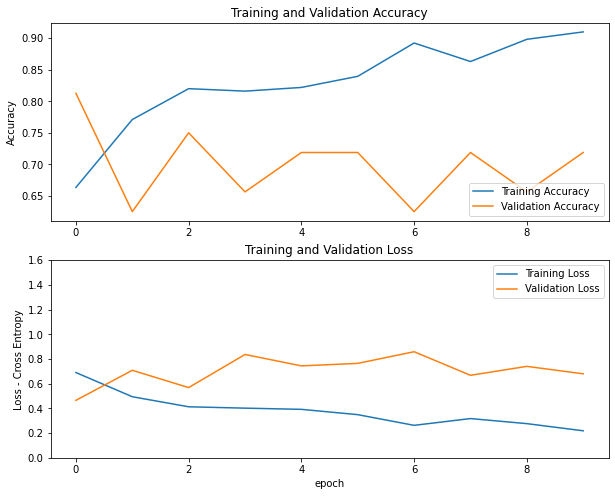

In [18]:
# -- Plot learning curves -- 
learning_curves(history)

In [19]:
# -- Evaluate the model on the test data -- 
loss, accuracy = model.evaluate(x=test_data)
print("test loss: ", loss, ", test acc: " , 100*accuracy, "%")

5/5 [==============================] - 45s 9s/step - loss: 0.6628 - accuracy: 0.7518
test loss:  0.6628177762031555 , test acc:  75.17730593681335 %


The predicted output is : [[0.94431573 0.05568419]]
It's run


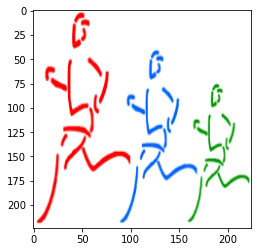

In [21]:
#Using PIL
import PIL
import numpy as np
from matplotlib import pyplot
from PIL import Image, ImageOps
size = (224,224)
url = input(" Please enter a url : ")
picture = Image.open(url)
pyplot.imshow(picture)
picture = ImageOps.fit(picture, size, Image.ANTIALIAS)
picture = picture.convert('RGB')
picture = np.asarray(picture)
picture = (picture.astype(np.float32) / 255.0)
picture_reshape = picture[np.newaxis,...]
y_pred = model.predict(picture_reshape)
print(f'The predicted output is : {y_pred}')
if np.argmax(y_pred) == 0:
  print("It's run")
elif np.argmax(y_pred) == 1:
  print("It's walk")
